In [111]:
import numpy as np
import math 
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt


# Project 1: Optimization 

## Minimizing Travel Time
- Optimization is often used in Classical Mechanics.
- The Minimizing Travel Time was a common problem in Classical Mechanics when introducing optimization.
- The objective of the problem is to choose a path tha would get you to the desire location in less time. It is important to remember that less time does not explicitly means the shortest distance. 
- Below is an image of the problem I will try to optimize
    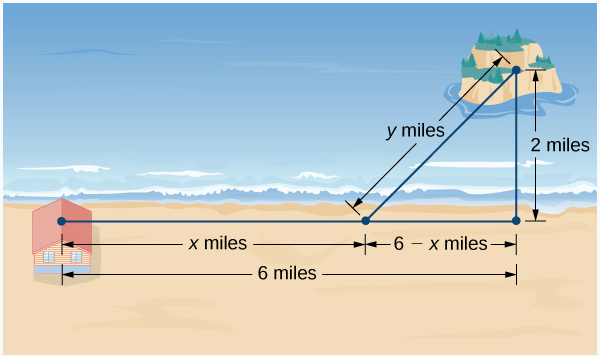

### Equations for time

In [60]:
# time spend swimming 

T_swiming = y/3

# time spend runnig 

T_running = x/8

#Total time 

T_swimming  + T_running

#T = (x/8) + (y/3)

# using pythagorian theorem 
y = math.sqrt((6-x)**2 + 4)


### Defining the total time function and the derivative of  the time function 

In [96]:
# function for total time, T(x)
def T(x):
    return ((x/8) + (math.sqrt((6-x)**2 + 4))/3)


### Testing the end points, x=0 and x=6

In [93]:
# The time is given in hours
x0 = (6)
print(T(x0))

1.4166666666666665


In [98]:
# The time is given in hours
x0 = (0)
print(T(x0))

2.1081851067789197


### Value of critical point
- The critical point can be found using scipy.optimize.fmin

In [107]:
# local minimum of T
fmin(T,(10))

#any initial position will give you the same critical point of 5.1909375

Optimization terminated successfully.
         Current function value: 1.368017
         Iterations: 19
         Function evaluations: 38


array([5.190979])

- The function T has a local minimum at x = 5.1909375 
- The critical point minimized the time for the corresponding x value to 1.368017 hours

### Defining the function and Constraints 

In [ ]:
def Objective(x):
    return 
def Constraint(x):
    return


# Project 2: Data Analysis

## Nucleosynthesis
- Nucleosynthesis is part of the High Energy Physics. - Nucleosynthesis is the process where new elements are produced by a series of nuclear reactions.
- There are two main periods of nucleosynthesis:
    - Big Bang Nucleosynthesis, BBN, which took place in the first minutes after the Big Bang. In this period, light elements were formed.
    - Stellar Nucleosynthesis is the process responsible for producing elements heavier than lithium. 
        - Stellar Nucleosynthesis is further divided into:
            - Explosive Nucleosynthesis
            - Cosmic Ray Fission
            - Merging Neutron Stars
- Between nucleosynthesis, the periodic table of elements as we know it today was populated. 
- In this notebook, we are going to analyze the processes that are responsible for the majority of the production elements. 

## Importing and Reading 

- I am going to use pandas to import and read the csv file.

In [15]:
# read data table from csv file with pandas 
# data is our dataframe
# dataframe is a two dimensional structure with labeled axes.
data = pd.read_csv('/Users/valeriapena/Downloads/Nucleosynthetic origins of the elements - Sheet1.csv')


- The data table have been imported and now we can use 
    - data.head() to preview the first couple of lines 
    - data.tails() to preview the last couple of lines 

In [13]:
# preview the first 20 lines of the loaded data table
data.head(20)

,Unnamed: 0,Atomic Number,Fraction Big Bang,Fraction Cosmic Ray Fission,Fraction Exploding Massive Stars,Fraction Exploding White Dwarfs,Fraction Merging Neutron Star,Fraction Dying Low-Mass Stars
0,H,1,1.00,0.00,0.00,0.00,0.0,0.00
1,He,2,0.90,0.00,0.05,0.00,0.0,0.05
2,Li,3,0.25,0.15,0.00,0.00,0.0,0.60
3,Be,4,0.00,1.00,0.00,0.00,0.0,0.00
4,B,5,0.00,1.00,0.00,0.00,0.0,0.00
5,C,6,0.00,0.00,0.25,0.00,0.0,0.75
6,N,7,0.00,0.00,0.25,0.00,0.0,0.75
7,O,8,0.00,0.00,1.00,0.00,0.0,0.00
8,F,9,0.00,0.00,1.00,0.00,0.0,0.00
9,Ne,10,0.00,0.00,1.00,0.00,0.0,0.00


In [14]:
# preview of the last 20 elements from the table
data.tail(20)

,Unnamed: 0,Atomic Number,Fraction Big Bang,Fraction Cosmic Ray Fission,Fraction Exploding Massive Stars,Fraction Exploding White Dwarfs,Fraction Merging Neutron Star,Fraction Dying Low-Mass Stars
74,Re,75,0.0,0.0,0.0,0.0,0.91,0.09
75,Os,76,0.0,0.0,0.0,0.0,0.91,0.09
76,Ir,77,0.0,0.0,0.0,0.0,0.99,0.01
77,Pt,78,0.0,0.0,0.0,0.0,0.95,0.05
78,Au,79,0.0,0.0,0.0,0.0,0.94,0.06
79,Hg,80,0.0,0.0,0.0,0.0,0.39,0.61
80,Tl,81,0.0,0.0,0.0,0.0,0.24,0.76
81,Pb,82,0.0,0.0,0.0,0.0,0.87,0.13
82,Bi,83,0.0,0.0,0.0,0.0,0.26,0.74
83,Po,84,NaN,NaN,NaN,NaN,NaN,NaN


## Big Bang Nucleosynthesis

- From the data table I am selcting the columns I want to analyze 

In [21]:
# BBN nucleosynthesis data 
data[['Atomic Number', 'Fraction Big Bang']]

,Atomic Number,Fraction Big Bang
0,1,1.00
1,2,0.90
2,3,0.25
3,4,0.00
4,5,0.00
5,6,0.00
6,7,0.00
7,8,0.00
8,9,0.00
9,10,0.00


### Creating plots

- Now, I am going to create a plot the data that belong to the BBN

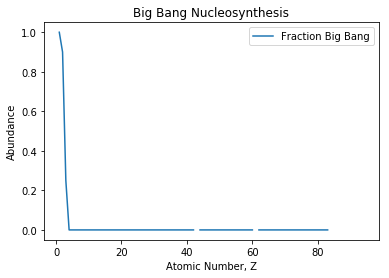

In [20]:
data.plot(x='Atomic Number', y='Fraction Big Bang', title='Big Bang Nucleosynthesis')
plt.xlabel('Atomic Number, Z')
plt.ylabel('Abundance')
plt.legend(loc='upper right')


- The plot shows the small fraction of elements that were produced during the BNN. 

Text(0, 0.5, 'Abundance')

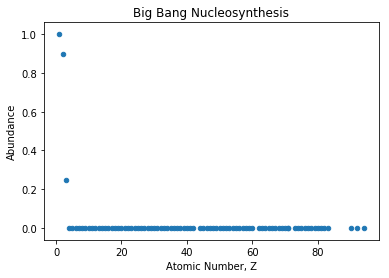

In [16]:
data.plot(x='Atomic Number', y='Fraction Big Bang', kind='scatter', title='Big Bang Nucleosynthesis')
plt.xlabel('Atomic Number, Z')
plt.ylabel('Abundance')

- It is easier to see in the scatter plot for BBN that only three elemets were produced in this initial process.
- These elements are Hydrogen, Helium and a much smaller fraction of Lithium. 

## Stellar Nucleosynthesis

In [23]:
# selecting the data for processes of Explosive Massive Stars and Low-Mass dying Stars
data[['Atomic Number', 'Fraction Exploding Massive Stars', 'Fraction Dying Low-Mass Stars']]

,Atomic Number,Fraction Exploding Massive Stars,Fraction Dying Low-Mass Stars
0,1,0.00,0.00
1,2,0.05,0.05
2,3,0.00,0.60
3,4,0.00,0.00
4,5,0.00,0.00
5,6,0.25,0.75
6,7,0.25,0.75
7,8,1.00,0.00
8,9,1.00,0.00
9,10,1.00,0.00


## Creating Plots

### Explosive Nucleosynthesis

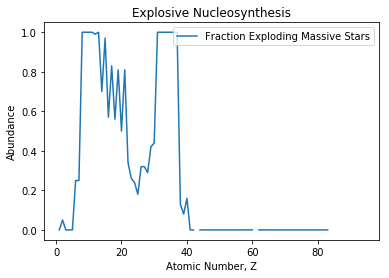

In [7]:
data.plot(x='Atomic Number', y='Fraction Exploding Massive Stars', title='Explosive Nucleosynthesis')
plt.xlabel('Atomic Number, Z')
plt.ylabel('Abundance')
plt.legend(loc='upper right')

### Low-Mass Dying Stars

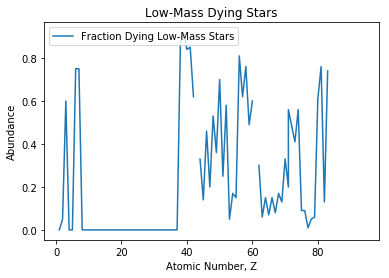

In [12]:
data.plot(x='Atomic Number', y='Fraction Dying Low-Mass Stars', title='Low-Mass Dying Stars')
plt.xlabel('Atomic Number, Z')
plt.ylabel('Abundance')
plt.legend(loc='upper left')

### Scatter plots

Text(0, 0.5, 'Abundance')

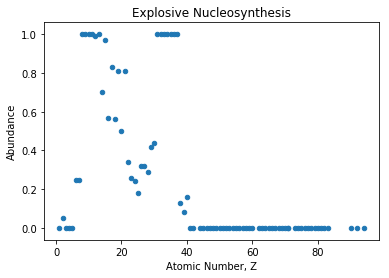

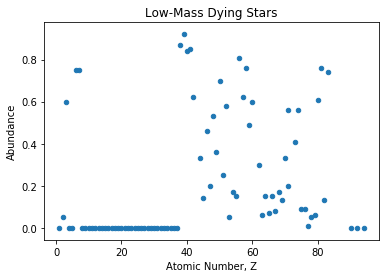

In [17]:
data.plot(x='Atomic Number', y='Fraction Exploding Massive Stars', kind='scatter', title='Explosive Nucleosynthesis')
plt.xlabel('Atomic Number, Z')
plt.ylabel('Abundance')

data.plot(x='Atomic Number', y='Fraction Dying Low-Mass Stars', kind='scatter', title='Low-Mass Dying Stars')
plt.xlabel('Atomic Number, Z')
plt.ylabel('Abundance')


- Majority of the elements produced in the process of Explosive Nucleosynthesis have an atomic mass in between the range of approximately 1 to 40.
- Low-Mass Dying Stars produced most of the heavier elements but some of the lightest elements, too. 

# Particle in a Box
- Quantum mechanics 